# Gaussian Bayes

In **Gaussian Bayes Classifier**, we assume the observations within each class are drawn from a multivariate Gaussian distribution with a class specific $K$ mean vector and covariance matrix, namely,
$$X\mid Y = k\sim \mathcal{N}(\mu_k,\Sigma_k).$$
This algorithm plugs estimates for the parameters into Bayes’ theorem in order to perform prediction. 

The density function of the $k$-th class is
$$f_k(x)=\frac{1}{(2\pi)^{p/2}|\Sigma_k|^{1/2}}\exp(-\frac{1}{2}(x-\mu_k)^T\Sigma^{-1}_k(x-\mu_k))$$

Prior density function of the $k$-th class is
$$\pi_k=\mathbb{P}(Y=k)$$

We use the estimation to approximate

$$\hat{\pi}_k=\frac{n_k}{n}$$

The probability of $x$ is class $k$ is

\begin{align*}
\mathbb{P}(Y=k\mid X=x)&=\frac{\mathbb{P}(X=x\mid Y=k)\mathbb{P}(Y=k)}{\Sigma_{l=1}^K\mathbb{P}(X=x\mid Y=l)\mathbb{P}(Y=l)}\\
&=\frac{f_k(x)\pi_k}{\Sigma_{l=1}^Kf_l(x)\pi_l}\\
\end{align*}

And we will assign $X$ into class $k$ if $f_k(x)\pi_k$ is largest, i.e. choose $k$ that maximizes

\begin{align*}
\delta_k&=-\frac{1}{2}(x-\mu_k)^T\Sigma^{-1}_k(x-\mu_k)-\frac{1}{2}\log|\Sigma_k|+\log{\pi_k}\\
&=-\frac{1}{2}x^T\Sigma^{-1}_kx+x^T\Sigma^{-1}_k\mu_k-\frac{1}{2}\mu_k^T\Sigma^{-1}_k\mu_k-\frac{1}{2}\log|\Sigma_k|+\log{\pi_k}.
\end{align*}


In [1]:
from __future__ import division
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class GaussianBayes(object):
    
    def __init__(self):
        
        pass
        
    def training(self, X, y):
        '''
        Parameter estimation: class prior, mean and covariance
        -------------------------------
        y: array-like, labels of training set
        
        return: none
        '''    
        # Initialize necessary parameters
        self.X = X
        self.y = y
        self.mean_collection = {}
        self.covariance_collection = {}
        # Fetch the classes in training set and the numbers of observations w.r.t. those classes
        freq = np.unique(self.y, return_counts = True)
        # A dict, where the key is the names of classes and value is the priors of labels
        self.class_prior = dict(zip(freq[0], freq[-1]/len(y)))
        self.labels = self.class_prior.keys()
        # For each class, estimate the mean and covariance
        for c in self.labels:
            X_c = self.X[np.where(self.y == c)]
            prior_c = self.class_prior[c]
            mean_c = X_c.mean(axis = 0)
            covariance_c = np.cov(X_c.T)
            self.mean_collection[c] = mean_c
            self.covariance_collection[c] = covariance_c
        
    def predict(self, X):
        '''
        Predict: predict the labels of a collection of instances.
        -------------------------------
        X: array-like, a collection of instances to be classified
        
        return: the corresponding labels
        '''    
        prediction_collection = []
        # compute the prob of point x in k-th class
        for i in range(X.shape[0]):
            self.log_prob_collection = []
            # Collect all the posterior distributions at `X[i]`
            for c in self.labels:
                mean_c = self.mean_collection[c]
                covariance_c = self.covariance_collection[c]
                prior_c = self.class_prior[c]
                self.log_prob_collection.append(-0.5 * np.dot(np.dot((X[i]-mean_c).T, np.linalg.inv(covariance_c)), 
                                                              (X[i]-mean_c))-0.5*np.log(np.linalg.det(covariance_c))+np.log(prior_c))
            # Approximate Gaussian Bayes decision rule
            prediction_collection.append(self.labels[np.argmax(self.log_prob_collection)])
        return np.array(prediction_collection)

In [3]:
def plot_2d_boundary(X, y, predict_function, scale = 1, stride = 0.1, fig_size = (12, 8)):
    # X is a 2d array, covariates
    # Y is an 1d array, labels
    # predict_function maps an observation to a label
    # scale controls the boundary of the plot
    # stride is the step size along the axes
    # fig_size is the size of the figure
    x_min, x_max = X[:, 0].min() - scale, X[:, 0].max() + scale
    y_min, y_max = X[:, 1].min() - scale, X[:, 1].max() + scale
    # Produce the coordinates of the points will be predicted
    xx, yy = np.meshgrid(np.arange(x_min, x_max, stride), np.arange(y_min, y_max, stride))
    # Predict
    print stride
    Z = predict_function(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize= fig_size)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.rainbow)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.binary)
    plt.ylim(yy.min(), yy.max())
    plt.show()

0.05


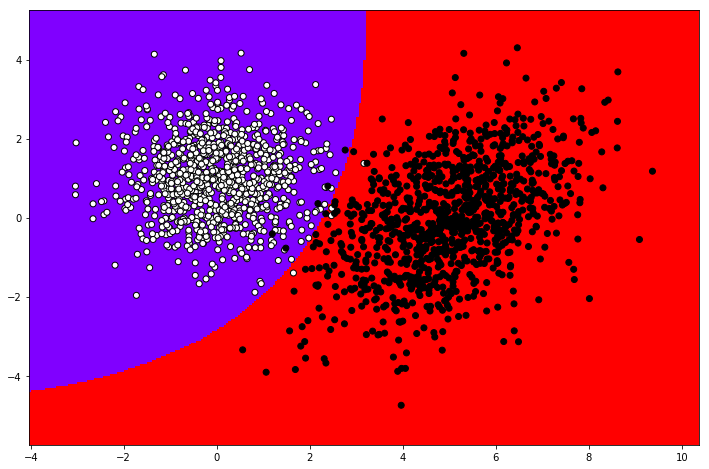

In [4]:
X_0 = np.random.multivariate_normal(mean = np.array([0,1]), cov = np.array([[1, 0], [0, 1]]), size = 1000)
y_0 = np.zeros_like(X_0[:,0], dtype = np.int16)
X_1 = np.random.multivariate_normal(mean = np.array([5,0]), cov = np.array([[2, 1], [1, 2]]), size = 1000)
y_1 = np.ones_like(X_1[:,0], dtype = np.int16)

X = np.vstack((X_0, X_1))
y = np.hstack((y_0, y_1))

GB = GaussianBayes()
GB.training(X, y)
plot_2d_boundary(X, y, GB.predict, stride = 0.05)

0.05


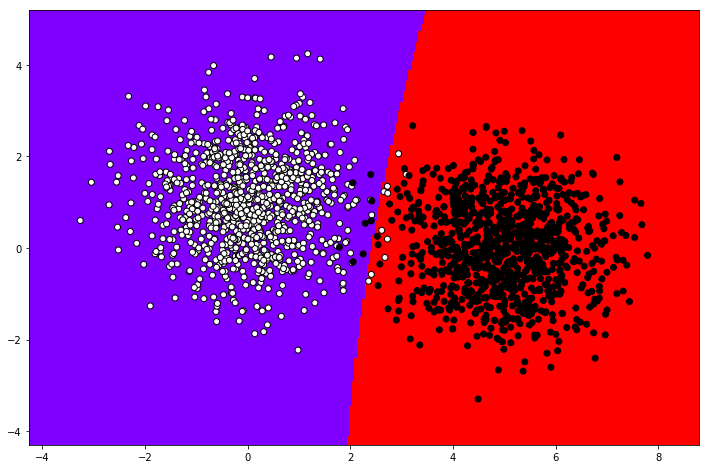

In [5]:
X_0 = np.random.multivariate_normal(mean = np.array([0,1]), cov = np.array([[1, 0], [0, 1]]), size = 1000)
y_0 = np.zeros_like(X_0[:,0], dtype = np.int16)
X_1 = np.random.multivariate_normal(mean = np.array([5,0]), cov = np.array([[1, 0], [0, 1]]), size = 1000)
y_1 = np.ones_like(X_1[:,0], dtype = np.int16)

X = np.vstack((X_0, X_1))
y = np.hstack((y_0, y_1))

GB = GaussianBayes()
GB.training(X, y)
plot_2d_boundary(X, y, GB.predict, stride = 0.05)

In [6]:
GB.predict(np.random.multivariate_normal(mean = np.array([5,0]), cov = np.array([[1, 0], [0, 1]]), size = 10))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int16)